 # Exercice 1

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import time


import torch, torchvision
import sys
import os
path = "./temp"   # chemin vers un répertoire temporaire


In [2]:


a=b=c=0
commands = [
'@@@  Differentes manieres de créer un tenseur',
'a = torch.zeros(4)',
'a = torch.ones(3)',
'a = torch.ones((2,4))',
'c = a.shape',
'a = torch.tensor([4,5,6,7])',
'a = torch.tensor([[1,2,3],[4,5,6]])',
'c = a.shape',
'a = torch.rand((2,3))         # valeurs entre 0 et 1',

'@@@  Opérations sur les tenseurs',
'a = torch.tensor([[1,2,3],[4,5,6]])',
'b = a + 3',
'b = a * 3',
'b = a + a',
'b = b * b   # attention',
'b = a + [1,0,1,0]   #opération non permise',

'@@@   Extraction',
'a = torch.tensor([1,2,3])',
'b = a[1]        # ne retourne pas un float mais un tenseur',
'b = a[1] + 5    # +5 se fait dans l espace des tenseurs',
'b = float(a[1]) # pour récupérer les valeurs dans un tenseur',
'a[1] = 9        # modification de la valeur d un tenseur',

'@@@   Range Indexing',
'a = torch.tensor([[1,2,3,4],[6,7,8,9]])',
'b = a[0]',
'b = a[1]',
'b = a[0][1:]   # indices >=1',
'b = a[0][:2]   # indices < 2',
'b = a[0][-1]   # en partant de la fin',
'b = a[0][:]    # : signifie tous les éléments',

'@@@   Broadcasting',
'a = torch.tensor([ [[1,2,3],[4,5,6]], [[10,20,30],[40,50,60]]])',
'b = a.shape',
'b = torch.tensor([[0,0,1],[1,2,2 ]])',
'c = a + b  # opération non possible en math car matrices de différentes tailles',
'b = torch.tensor([0,0,1])',
'c = a + b  # opération non possible en math car matrices de différentes tailles',

'@@@   Load/Save tensor',
'a = torch.rand((4,3))',
'torch.save( a, path + "test.data" )',
'b = torch.load(path + "test.data")',

]


In [3]:
def Demo():

    for cmd in commands :
        print(cmd)
        if cmd.find('@')< 0  :
            try :
                exec(cmd)
            except:
                print("  ERROR :", sys.exc_info()[1] )
            time.sleep(7)

        if cmd.startswith('a') : print("  a ==> ", locals()['a'])
        if cmd.startswith('b') : print("  b ==> ", locals()['b'])
        if cmd.startswith('c') : print("  c ==> ", locals()['c'])
        print()

toPIL    = torchvision.transforms.ToPILImage()
toTensor = torchvision.transforms.ToTensor()


def ShowTensorImg(T2):
  PILImg = toPIL(T2)
  if len(T2.shape) == 3:
      plt.imshow(PILImg)   # RGB
  else:
      plt.imshow(PILImg,cmap='gray') #gray

  plt.show()

In [4]:
# Demo()


In [5]:

##########################
##
##   Vous ne devez pas utiliser de boucle for
##   Les images doivent être construites dans un tenseur à valeurs dans [0,1]
##
##########################

def Ex1() :
    # 0 = noir 1 = blanc
    # affichez une image en niveau de gris de 320 de largeur & 200 de hauteur
    # la moitié supérieure sera blanche et la moitié inférieure sera noire
    # attention les images sont stockées sous la forme [y][x]
    w, h = 320, 200
    T = torch.zeros(h, w)
    T[:h//2, :] = 1
    T[h//2:, :] = 0
    
    ShowTensorImg(T)

def Ex2() :
    # 0 = noir 1 = blanc
    # affichez une image en niveau de gris de 300 de largeur & 300 de hauteur
    # cette image contient en son centre un carré 100x100 rempli de bruit
    # pour réaliser cette exercice, il faudra utiliser la syntaxe T1[a:b,c:d] = T2
    w, h = 320, 200
    l = 50
    
    
    T = torch.zeros(h, w)
    T[h//2 - l//2 : h//2 + l//2, w//2 - l//2 : w//2 + l//2] = torch.rand(l, l)
    ShowTensorImg(T)

def Ex3():
    # créez une image RVB de 320x200
    # cette image sera remplie d'une couleur unique, un
    # bleu des mers du sud : R = 0 / V = 80% / B = 80%
    # attention les images RGB sont stockées sous la forme [3][y][x]
    w, h = 320, 200
    T = torch.zeros(3, h, w);
    T[1:] = 0.8
    ShowTensorImg(T)


##############################################################
#
#   Quelques exercices sur de vraies images ! Houha !



def Ex10() :
    # tenseur contenant 5 images RVB de résolution 150x100
    T1 = torch.load('S2_Ex_1_data')
    # extraire le sous tenseur correspondant à l'image du penda
    T2 = T1[2]
    ShowTensorImg(T2)

def Ex11() :
    # tenseur contenant 5 images RVB de résolution 150x100
    T1 = torch.load('S2_Ex_1_data')
    # extraire le sous tenseur correspondant à l'image du penda
    # construisez un tenseur [100][150]
    # il va contenir la conversion en image grayscale du penda
    # en utilisant la formule :
    # Gray = 0.3 * R + 0.59 * G + 0.11 * B
    TP = T1[3]
    T2 = 0.3 * TP[0] + 0.59 * TP[1] + 0.11 * TP[2]
    
    ShowTensorImg(T2)

def Ex12() :
    T1 = torch.load('S2_Ex_1_data')
    # créez une image de 300x200, les 4 zones disponibles doivent
    # contenir quatre animaux différents
    w, h = 150, 100
    T2 = torch.zeros(3, 2*h, 2*w)
    # coin haut gauche
    T2[:, :h, :w] = T1[0]
    T2[:, h:, :w] = T1[1]
    T2[:, :h, w:] = T1[2]
    T2[:, h:, w:] = T1[3]
    T3 = torch.cat((torch.cat((T1[0], T1[1]), 1), torch.cat((T1[2], T1[3]), 1)), 2)
    ShowTensorImg(T2)
    ShowTensorImg(T3)

def Ex13() :
    T1 = torch.load('S2_Ex_1_data')
    # créez une image RVB correspondant à la superposition de l'image
    # du penda et du serpent (faites la moyenne sur chaque couche R/V/B
    w, h = 150, 100
    T2 = (T1[0] + T1[1]) / 2
    ShowTensorImg(T2)


def Ex14() :
    T1 = torch.load('S2_Ex_1_data')
    # créez une image RVB 150x100
    # chaque plan R/V/B correspondra à un plan R/V/B d'un animal différent
    w, h = 150, 100
    T2 = torch.zeros(3, h, w)
    T2[0] = T1[0][0]
    T2[1] = T1[1][1]
    T2[2] = T1[2][2]
    ShowTensorImg(T2)

def Ex15() :
    T1 = torch.load('S2_Ex_1_data')
    # sélectionnez l'image du serpent
    # multipliez par 40% les valeurs pour éclaircir l'image
    # ajoutez un gris 15% pour relever les noirs
    # pensez à écrétez les valeurs > 1
    # pour cela utiliser la syntaxe suivante : T[T>val] = val
    T2 = T1[4];
    T2 *= 1.4
    T2 += 0.15
    T2[T2 > 1.] = 1.
    ShowTensorImg(T2)






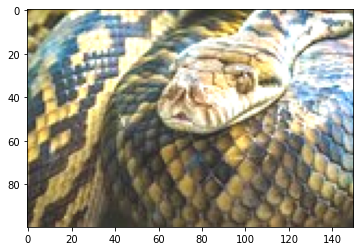

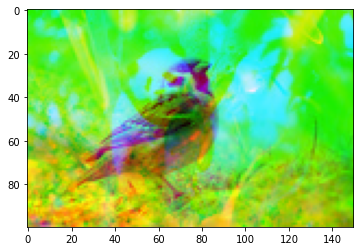

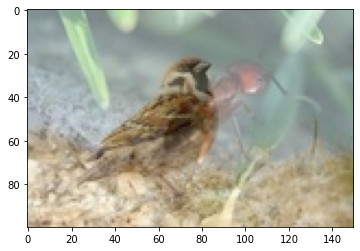

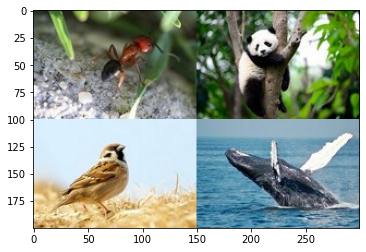

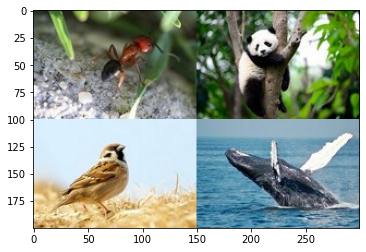

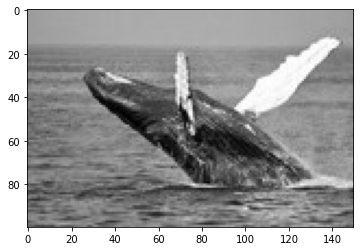

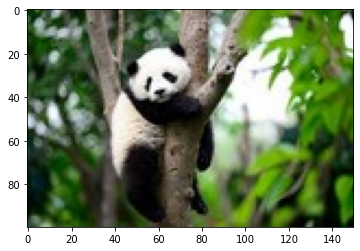

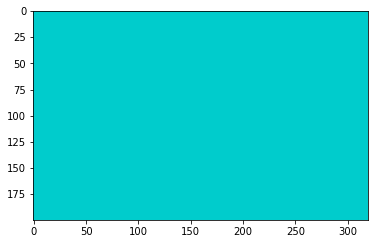

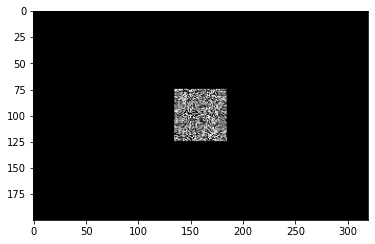

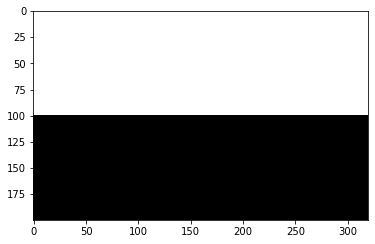

In [6]:
Ex15()
Ex14()
Ex13()
Ex12()
Ex11()
Ex10()
Ex3()
Ex2()
Ex1()


# Exercice 2

In [14]:
# Comment installer Pytorch : https://pytorch.org/get-started/locally/

####################################################################
#
#  Objectif

# On se propose comme dans l'ex vu en cours de faire apprendre
# à une fonction le comportement de l'opérateur booléen != (différent)
# => 1 si différent   => 0 si égal

# L'apprentissage doit s'effectuer sur le set d'échantillons suivant :
# (4,2)   (6,-3)    (1,1)    (3,3.1)
# Cela sous-entend que si l'apprentissage réussit, l'évaluation en dehors
# de ces valeurs peut quand même etre totalement erronée.

# La fonction choisie pour l'apprentissage sera : min(a*|xi-yi|,1)
# avec -a- comme unique paramètre d'apprentissage

# la fonction d'erreur sera simplement : |fnt(xi,yi)-verite_i|

layer_func = lambda a : lambda x : torch.min((a * torch.abs(x[:][0] - x[:][1]).add(1)))
loss_func  = lambda y, y_pred  : torch.abs(y - y_pred).sum()

dtype = torch.float64


In [15]:
####################################################################
#
#  Aspect technique

# Pour forcer les tenseurs à utiliser des nombres flottants,
# nous utilisons la syntaxe suivante :
x_train = torch.tensor([[4, 2], [6, -3], [1, 1], [3, 3.1]], dtype=dtype)
y_train = torch.tensor([     0,       0,     1,       0], dtype=dtype)


# pour créer notre paramètre d'apprentissage et préciser que pytorch
# devra gérer son calcul de gradient, nous écrivons :

a = torch.tensor([ 0.1 ], dtype=dtype, requires_grad=True)


In [19]:
number_epochs = 400
learning_rate = 1e-4

for epoch in range(number_epochs):
    
    # Passe FORWARD :
    # Essayez de vous passer d'une boucle for.
    # Utilisez les tenseurs pour traiter tous les échantillons en parallèle.
    # Calculez les valeurs en sortie de la fonction.
    # Calculez l'erreur totale sur l'ensemble de nos échantillons.
    # Les fonctions mathématiques sur les tenseurs s'utilisent ainsi :
    # torch.abs(..) / torch.min(..)  / torch.sum(..)  ...
    layer = layer_func(a)
    
    y_pred = layer(x_train)
    
    loss = loss_func(y_train, y_pred)
    
    
    # A chaque itération, affichez la valeur de a et de l'erreur totale
    print("--- epoch {0} : a = {1}, loss = {2}".format(epoch, a.item(), loss.item()))

    # Passe BACKWARD :
    # Lorsque le calcul de la passe Forward est terminé,
    # nous devons lancer la passe Backward pour calculer le gradient.
    # Le calcul du gradient est déclenché par la syntaxe :
          
    loss.backward()

    # GRADIENT DESCENT :
    # Effectuez la méthode de descente du gradient pour modifier la valeur
    # du paramètre d'apprentissage a. Etrangement, il faut préciser à Pytorch
    # d'arrêter de calculer le gradient de a en utilisant la syntaxe ci-après.
    # De plus, il faut réinitialiser le gradient de a à zéro manuellement :

    with torch.no_grad() :
        a -= learning_rate * a.grad
        a.grad.zero_()
    
    

--- epoch 0 : a = 0.0009999999999996362, loss = 1.005999999999998
--- epoch 1 : a = 0.0003999999999996361, loss = 1.002399999999998
--- epoch 2 : a = -0.00020000000000036395, loss = 1.0048000000000086
--- epoch 3 : a = 0.0021999999999996363, loss = 1.0131999999999977
--- epoch 4 : a = 0.0015999999999996362, loss = 1.0095999999999976
--- epoch 5 : a = 0.0009999999999996362, loss = 1.005999999999998
--- epoch 6 : a = 0.0003999999999996361, loss = 1.002399999999998
--- epoch 7 : a = -0.00020000000000036395, loss = 1.0048000000000086
--- epoch 8 : a = 0.0021999999999996363, loss = 1.0131999999999977
--- epoch 9 : a = 0.0015999999999996362, loss = 1.0095999999999976
--- epoch 10 : a = 0.0009999999999996362, loss = 1.005999999999998
--- epoch 11 : a = 0.0003999999999996361, loss = 1.002399999999998
--- epoch 12 : a = -0.00020000000000036395, loss = 1.0048000000000086
--- epoch 13 : a = 0.0021999999999996363, loss = 1.0131999999999977
--- epoch 14 : a = 0.0015999999999996362, loss = 1.0095999

--- epoch 305 : a = 0.0009999999999996362, loss = 1.005999999999998
--- epoch 306 : a = 0.0003999999999996361, loss = 1.002399999999998
--- epoch 307 : a = -0.00020000000000036395, loss = 1.0048000000000086
--- epoch 308 : a = 0.0021999999999996363, loss = 1.0131999999999977
--- epoch 309 : a = 0.0015999999999996362, loss = 1.0095999999999976
--- epoch 310 : a = 0.0009999999999996362, loss = 1.005999999999998
--- epoch 311 : a = 0.0003999999999996361, loss = 1.002399999999998
--- epoch 312 : a = -0.00020000000000036395, loss = 1.0048000000000086
--- epoch 313 : a = 0.0021999999999996363, loss = 1.0131999999999977
--- epoch 314 : a = 0.0015999999999996362, loss = 1.0095999999999976
--- epoch 315 : a = 0.0009999999999996362, loss = 1.005999999999998
--- epoch 316 : a = 0.0003999999999996361, loss = 1.002399999999998
--- epoch 317 : a = -0.00020000000000036395, loss = 1.0048000000000086
--- epoch 318 : a = 0.0021999999999996363, loss = 1.0131999999999977
--- epoch 319 : a = 0.001599999999

In [68]:
x_test = torch.tensor([[1, 2], [2, -5], [8, 8], [0., 0.1]], dtype=dtype)


In [69]:

y_pred = layer(x_test)

loss = loss_func(y, y_pred)
  